<h2 id="Understanding the shape of the data (EDA)">Understanding the shape of the data (EDA)</h2>

For this data I'll use the pandas_profiling library which automatically generates a standardized univariate and multivariate report for data understanding (https://pandas-profiling.ydata.ai/docs/master/pages/getting_started/overview.html)

In [1]:
# import libraries
# %pip install pandas_profiling
# %pip install discover_feature_relationships

from discover_feature_relationships import discover
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [23]:
#reading data
training=pd.read_excel('bike_train.xlsx')
test=pd.read_excel('bike_test.xlsx')

In [3]:
prof=ProfileReport(training)
prof.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<h3 id="Report takeaways:">Report takeaways:</h3>

- Numerical data: 10

- Categorical data: 6 = 
 season, year, holiday, weekday, workingday weathersit
  
    <pre>Please note that the profiling report isn't able to properly identify  "working day" as a
    categorical variable.
    Also, these variables are already standarized, so there is no need for a data-cleaning/standarizing procces </pre>


- Missing data: No data missing!

<b> Correlations from profiling Report: </b>

On one hand, data related with datetime (season, yr, mnth) has an intuitive correlation with climate conditions such as temp, atemp, windspeed and so on; while the hour (hr) seems to be well correlated with the counting rental features (casual, registered, cnt) 

On the other hand, holiday, weekday and working day have not an importance with the target features, so may be droped when building the ML model.



<b>Interesting correlations from profiling Report that may diserve further exploration: </b>
- hr + (casual, registered, cnt)
- temp + casual


lets see in depth these variables

<AxesSubplot:>

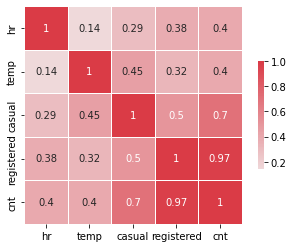

In [41]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(training[['hr','temp','casual','registered','cnt']].corr(),vmax=1, annot=True, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



Unfortunaly, the target data (cnt and derivates) have a weak correlation value with hr and temp, ranging from 0.38 to 0.45.
This will be take in mind when discusing the results of the models.

<b>Checking other climate conditions<b>

<AxesSubplot:>

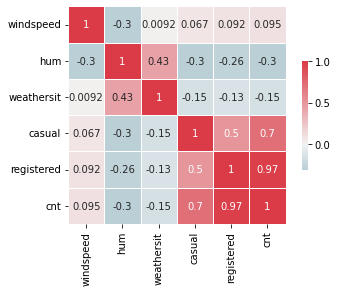

In [43]:
#correlations
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(training[['windspeed','hum','weathersit','casual','registered','cnt']].corr(),vmax=1, annot=True, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


There is no strong correlation in this variables, maybe the feature 'hum' could be worth of analysis

<AxesSubplot:>

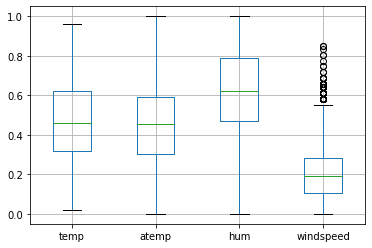

In [45]:
#checking for outliers
training.boxplot(column=['temp','atemp','hum','windspeed'])

Windspeed outliers has week correlation with cnt, and their distribution is odd. Not included in the ML

It looks like temp, hum and hr are among the variables the ones that can take a role in the  of cnt
Let's see their distribution

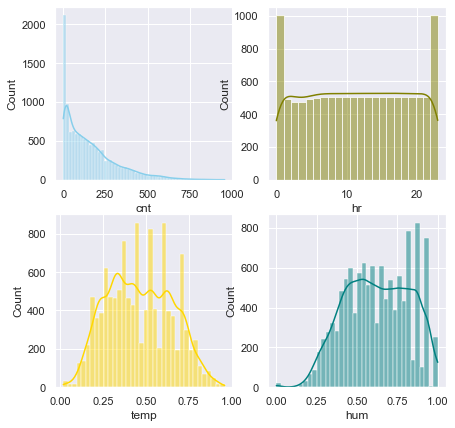

In [51]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=training, x="cnt", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=training, x="hr", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=training, x="temp", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=training, x="hum", kde=True, color="teal", ax=axs[1, 1])


plt.show()

temp and hum are continouos variables, and we could take them as normal distribution.

hr has a odd distriburtion, it could be worthy to generate bins and re-scaled.

<b3>General conclusion </b3>

- The target 'cnt' has not to high linear correlation with the given features, however, it's probably that further feature binning on variables such as temp, hr and hum, that seem to hold some influence with 'cnt', may clear up these issue.

<b3> Next steps </b3>


- Their will be a first attemp to make a ML model as a baseline with ALL the features (model_building)
- Then, features that are considered less relevant will be eliminated and rescaling will be performed to check for improvements in the model.
- As a final step, predictions will be attempted with more advanced models and processes such as GradientBoostingRegressor, VotingRegressor and StackingRegressor

<h3>Cleaning file after EDA analysis<h3>

In [24]:
training.drop(columns=['instant','dteday','yr','windspeed','atemp'], inplace=True) 
test.drop(columns=['instant','dteday','yr','atemp','windspeed'], inplace=True) 

In [28]:
training.to_csv('clean_training.csv',index=False)
test.to_csv('clean_test.csv',index=False)